In [1]:
import sys
sys.path.insert(0, "../../python")

from propagation import laser
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from scipy import integrate

In [2]:
# Test of a GRIN lens
Nx = 2**8
X = 300
x = np.linspace(-X/2, X/2, Nx, False)
Nz1 = 64
Z1 = 1000
z1 = np.linspace(0, Z1, Nz1)

n0 = 1.5834
w0 = 50
zR = np.pi * w0**2
E0 = np.exp(-x**2 / w0**2)

E1 = laser.fourier_prop(E0, x, z1, 1, n0)

Nz2 = 256
Z2 = 4000
z2 = np.linspace(0, Z2, Nz2)

k = 1.5421*10**-7
nih = np.repeat(np.reshape(-n0*(k/2)*x**2, (Nx, 1)), Nz2, axis=1)
E2 = laser.beam_prop(E1[Nz1-1,:], nih, x, z2, 1, n0)

Nz3 = 64
Z3 = 1000
z3 = np.linspace(0, Z3, Nz3)

E3 = laser.fourier_prop(E2[Nz2-1,:], x, z3, 1, n0)
#print(E2[Nz2-1,:])

E = np.concatenate((E1, E2[1:, :], E3[1:, :]))
Z = np.concatenate((z1, z2[1:]+z1[Nz1-1], z3[1:]+z1[Nz1-1]+z2[Nz2-1]))

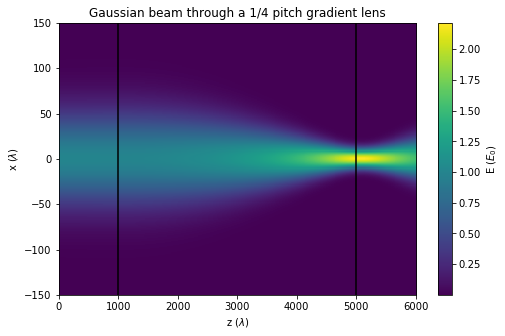

In [3]:
# Need to flip ud to put in the correct format for imshow
plt.figure(figsize=(8, 5))
plt.imshow(np.flipud(np.transpose(abs(E))), aspect='auto', extent=[0, Z1+Z2+Z3, -X/2, X/2])
plt.plot([Z1, Z1],[-X/2, X/2],'k-')
plt.plot([Z1+Z2, Z1+Z2],[-X/2, X/2],'k-')
cb = plt.colorbar()
cb.set_label(r'E ($E_0$)')
plt.xlabel(r'z ($\lambda$)')
plt.ylabel(r'x ($\lambda$)')
plt.title('Gaussian beam through a 1/4 pitch gradient lens')
plt.xlim([0, Z1+Z2+Z3])
plt.ylim([-150, 150])
plt.show()

In [7]:
# Test of a GRIN lens
Nx = 2**8
X = 300
x = np.linspace(-X/2, X/2, Nx, False)
Ny = 2**8
Y = X
y = np.linspace(-Y/2, Y/2, Ny, False)
# Before lens
Nz1 = 64
Z1 = 1000
z1 = np.linspace(0, Z1, Nz1)

n0 = 1.5834
w0 = 50
zR = np.pi * w0**2
E0 = np.exp(-(np.reshape(x, (Nx, 1))**2 + np.reshape(y, (1, Ny))**2) / w0**2)
# Propagate to the GRIN
E1 = laser.fourier_prop2(E0, x, y, z1, 1, n0)

# Inside lens
Nz2 = 256
Z2 = 4000
z2 = np.linspace(0, Z2, Nz2)
# Index of refraction
k = 1.5421*10**-7
nih = np.repeat(-n0*(k/2)*(np.reshape(x, (Nx, 1, 1))**2 + np.reshape(y, (1, Ny, 1))**2), Nz2, axis=2)
E2 = laser.beam_prop2(E1[Nz1-1,:, :], nih, x, y, z2, 1, n0)

# After lens
Nz3 = 64
Z3 = 1000
z3 = np.linspace(0, Z3, Nz3)

E3 = laser.fourier_prop2(E2[Nz2-1,:, :], x, y, z3, 1, n0)
#print(E2[Nz2-1,:])

E = np.concatenate((E1, E2[1:, :, :], E3[1:, :, :]))
Z = np.concatenate((z1, z2[1:]+z1[Nz1-1], z3[1:]+z1[Nz1-1]+z2[Nz2-1]))

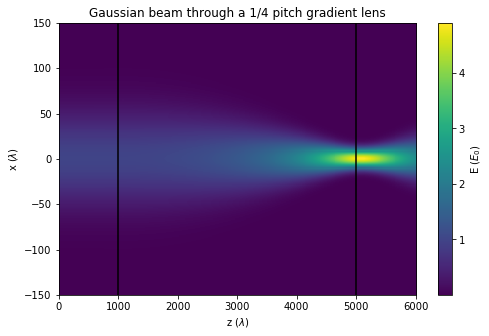

In [8]:
# Need to flip ud to put in the correct format for imshow
plt.figure(figsize=(8, 5))
plt.imshow(np.flipud(np.transpose(abs(E[:, :, int(Ny/2)]))), aspect='auto', extent=[0, Z1+Z2+Z3, -X/2, X/2])
plt.plot([Z1, Z1],[-X/2, X/2],'k-')
plt.plot([Z1+Z2, Z1+Z2],[-X/2, X/2],'k-')
cb = plt.colorbar()
cb.set_label(r'E ($E_0$)')
plt.xlabel(r'z ($\lambda$)')
plt.ylabel(r'x ($\lambda$)')
plt.title('Gaussian beam through a 1/4 pitch gradient lens')
plt.xlim([0, Z1+Z2+Z3])
plt.ylim([-150, 150])
plt.show()